In [4]:
import torch
import torchvision

device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.mps.is_available() else "cpu")

device

device(type='mps')

In [ ]:
%load_ext autoreload

%autoreload 2

In [5]:
from matplotlib import pyplot as plt

def plot_results(loss, train_acc, val_acc):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].plot(loss, label="train loss")
    axes[0].set_title("Loss")
    axes[0].legend()
    axes[1].plot(train_acc, label="train acc")
    axes[1].plot(val_acc, label="val acc")
    axes[1].set_title("Accuracy")
    axes[1].legend()
    plt.show()

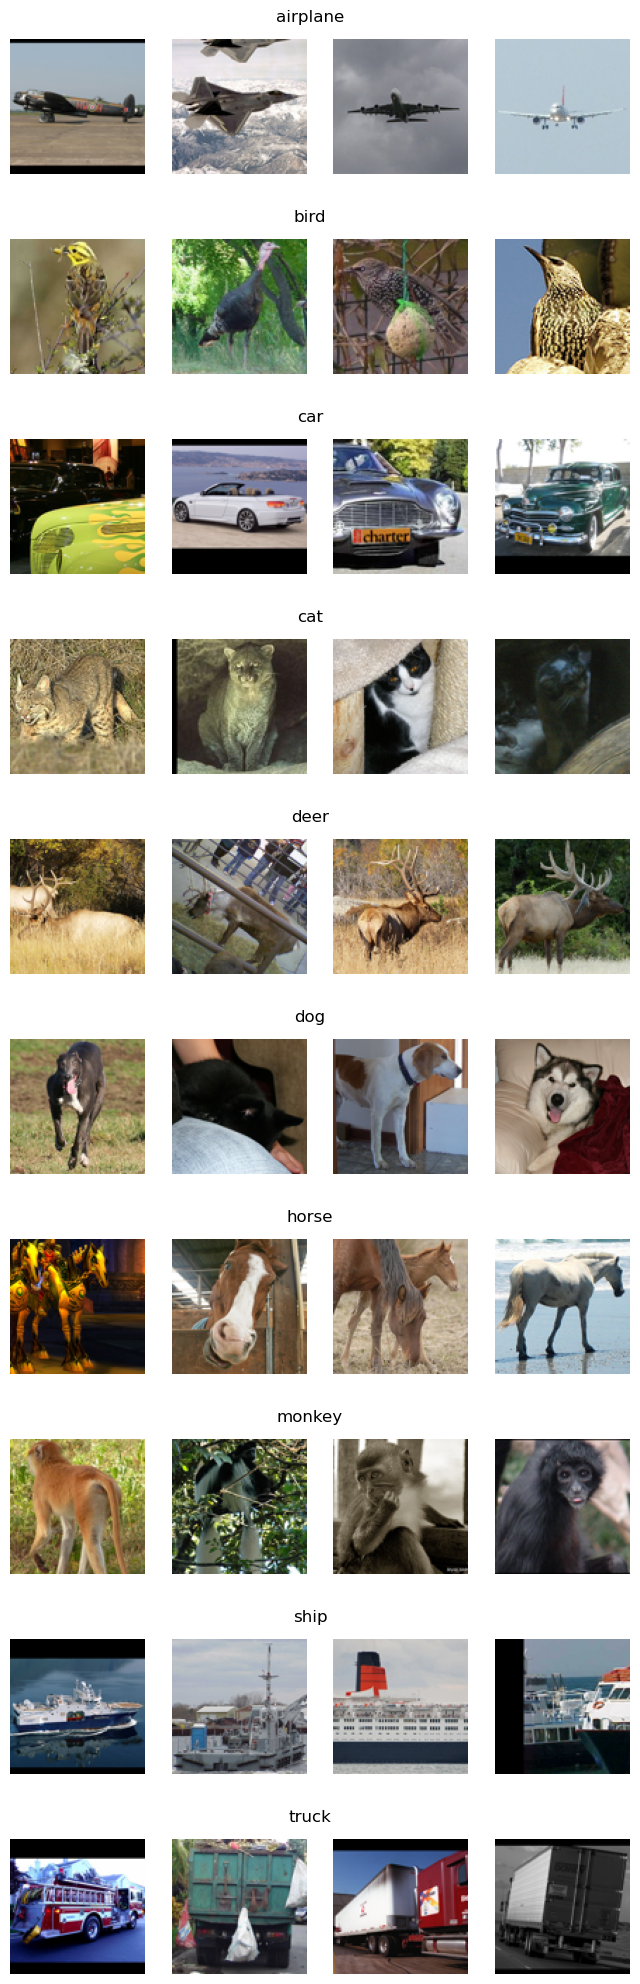

In [ ]:
from matplotlib import pyplot as plt

data = torchvision.datasets.STL10(
    root = f"./stl10",
    download=True,
)

labels_map = dict(zip(range(1,11), data.classes))

fig = plt.figure(figsize=(8, 20))
fig.tight_layout(pad=0.01)

subfigs = fig.subfigures(10, 1)


for i in range(10):
    class_indices = [idx for idx, target in enumerate(data.labels) if target == i]
    axes = subfigs[i].subplots(1, 4)
    subfigs[i].suptitle(labels_map[i + 1], fontsize=12)
    for j in range(4):
        img, _ = data[class_indices[j]]
        axes[j].imshow(img)
        axes[j].axis('off')


plt.show()

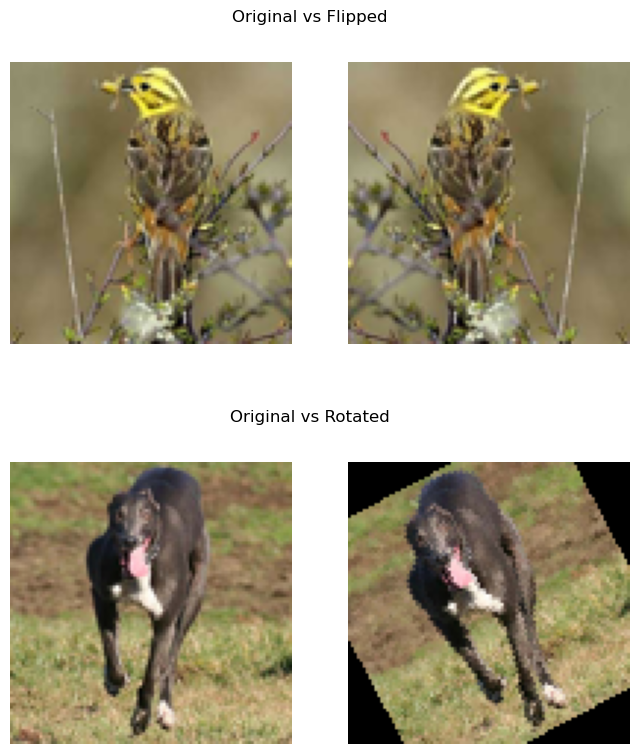

In [8]:
transformation_flip = torchvision.transforms.RandomHorizontalFlip(1.0)
transformation_rotate = torchvision.transforms.RandomRotation(30)

fig = plt.figure(figsize=(8, 8))
fig.tight_layout(pad=0.01)
subfigs = fig.subfigures(2, 1)

for i, idx in enumerate([0, 1]):
    original_img, _ = data[idx]
    axes = subfigs[i].subplots(1, 2)
    if i == 0:
        subfigs[i].suptitle(f"Original vs Flipped", fontsize=12)
        flipped_img = transformation_flip(original_img)
        axes[0].imshow(original_img)
        axes[0].axis('off')
        axes[1].imshow(flipped_img)
        axes[1].axis('off')
    else:
        subfigs[i].suptitle(f"Original vs Rotated", fontsize=12)
        rotated_img = transformation_rotate(original_img)
        axes[0].imshow(original_img)
        axes[0].axis('off')
        axes[1].imshow(rotated_img)
        axes[1].axis('off')

plt.show()

In [ ]:
train_data = torchvision.datasets.STL10(
    root="./stl10",
    split="train",
    transform = torchvision.transforms.Compose([
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.RandomRotation((0,30)),
        torchvision.transforms.RandomCrop((64,64)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=[0, 0, 0], std=[1, 1, 1]),
    ])
)

test_data =  torchvision.datasets.STL10(
    root="./stl10",
    split="test",
    transform = torchvision.transforms.Compose([
        torchvision.transforms.RandomCrop((64,64)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=[0, 0, 0], std=[1, 1, 1]),
    ])
)

train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_data, val_data = torch.utils.data.random_split(train_data, [train_size, val_size])

train_loader = torch.utils.data.DataLoader(
    train_data,
    batch_size=128,
    shuffle=True,
)

val_loader = torch.utils.data.DataLoader(
    val_data,
    batch_size=val_size,
    shuffle=False,
)

test_loader = torch.utils.data.DataLoader(
    test_data,
    batch_size=1000,
    shuffle=False,
)


In [ ]:
from models.lr import LogisticRegression

model = LogisticRegression(3 * 64 * 64, 10, device=device)
loss, training_accurracy, validation_accuracy = model.fit(train_loader, val_loader, 500, 0.01, 0.001)

test_accuracy = model.batched_evaluate(test_loader)
print(f"{test_accuracy=}")

plot_results(loss, training_accurracy, validation_accuracy)

Epoch 1/500, Loss: 2.301997184753418, Training Accuracy: 0.10107421875, Validation Accuracy: 0.1
Epoch 2/500, Loss: 2.302262783050537, Training Accuracy: 0.10302734375, Validation Accuracy: 0.099
Epoch 3/500, Loss: 2.3024585247039795, Training Accuracy: 0.1044921875, Validation Accuracy: 0.108
Epoch 4/500, Loss: 2.3023862838745117, Training Accuracy: 0.118896484375, Validation Accuracy: 0.122
Epoch 5/500, Loss: 2.3018441200256348, Training Accuracy: 0.135498046875, Validation Accuracy: 0.127
Epoch 6/500, Loss: 2.2985966205596924, Training Accuracy: 0.141357421875, Validation Accuracy: 0.132
Epoch 7/500, Loss: 2.303586959838867, Training Accuracy: 0.1279296875, Validation Accuracy: 0.14
Epoch 8/500, Loss: 2.3002090454101562, Training Accuracy: 0.141357421875, Validation Accuracy: 0.126
Epoch 9/500, Loss: 2.3001418113708496, Training Accuracy: 0.1435546875, Validation Accuracy: 0.109
Epoch 10/500, Loss: 2.3011555671691895, Training Accuracy: 0.129150390625, Validation Accuracy: 0.119
Epo

KeyboardInterrupt: 

Epoch 1/200, Loss: 2.3371386528015137, Training Accuracy: 0.1343194369612069, Validation Accuracy: 0.137
Epoch 2/200, Loss: 2.304277181625366, Training Accuracy: 0.15810210129310345, Validation Accuracy: 0.137
Epoch 3/200, Loss: 2.232875347137451, Training Accuracy: 0.16835600754310345, Validation Accuracy: 0.168
Epoch 4/200, Loss: 2.2535839080810547, Training Accuracy: 0.17845837823275862, Validation Accuracy: 0.175
Epoch 5/200, Loss: 2.227693796157837, Training Accuracy: 0.18449454471982757, Validation Accuracy: 0.155
Epoch 6/200, Loss: 2.232633352279663, Training Accuracy: 0.19181034482758622, Validation Accuracy: 0.193
Epoch 7/200, Loss: 2.2171273231506348, Training Accuracy: 0.19288793103448276, Validation Accuracy: 0.18
Epoch 8/200, Loss: 2.234273910522461, Training Accuracy: 0.20925377155172414, Validation Accuracy: 0.174
Epoch 9/200, Loss: 2.2421789169311523, Training Accuracy: 0.2003131734913793, Validation Accuracy: 0.208
Epoch 10/200, Loss: 2.1781797409057617, Training Accur

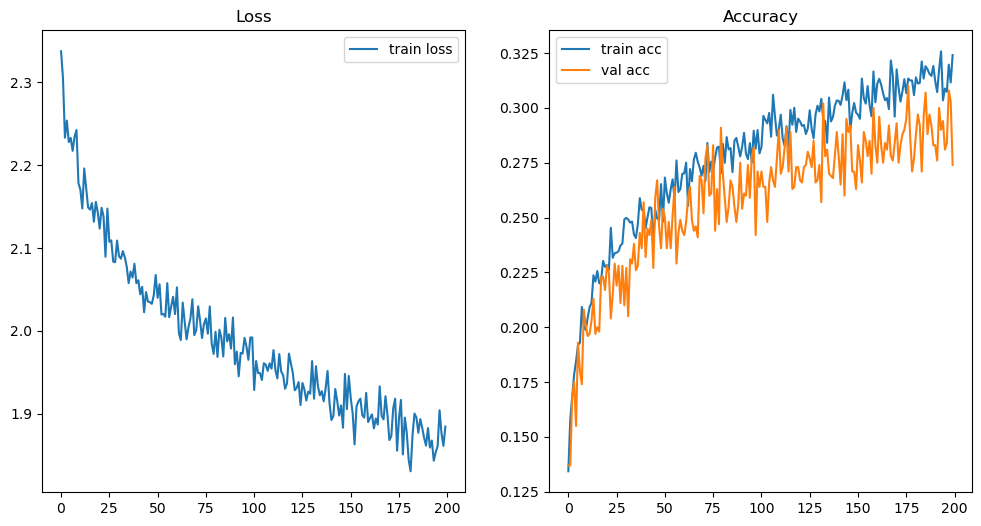

In [ ]:
from models.nn import NeuralNetwork

train_loader = torch.utils.data.DataLoader(
    train_data,
    batch_size=1024,
    shuffle=True,
)

model = NeuralNetwork(3 * 64 * 64, 16 * 16, 16 * 16, 8 * 8, 10, p = 0.3, device=device)
loss, training_accurracy, validation_accuracy = model.fit(train_loader, val_loader, 500, 0.01, 0.01)

test_accuracy = model.batched_evaluate(test_loader)
print(f"{test_accuracy=}")

plot_results(loss, training_accurracy, validation_accuracy)

Epoch 1/700, Loss: 2.3044168949127197, Training Accuracy: 0.121337890625, Validation Accuracy: 0.104
Epoch 2/700, Loss: 2.295100212097168, Training Accuracy: 0.13388166756465517, Validation Accuracy: 0.117
Epoch 3/700, Loss: 2.2930681705474854, Training Accuracy: 0.14187095905172414, Validation Accuracy: 0.139
Epoch 4/700, Loss: 2.2884650230407715, Training Accuracy: 0.14566776670258622, Validation Accuracy: 0.132
Epoch 5/700, Loss: 2.2819318771362305, Training Accuracy: 0.1503485317887931, Validation Accuracy: 0.154
Epoch 6/700, Loss: 2.276644468307495, Training Accuracy: 0.1527141702586207, Validation Accuracy: 0.131
Epoch 7/700, Loss: 2.277050733566284, Training Accuracy: 0.15592167295258622, Validation Accuracy: 0.13
Epoch 8/700, Loss: 2.2659523487091064, Training Accuracy: 0.16064453125, Validation Accuracy: 0.147
Epoch 9/700, Loss: 2.261631965637207, Training Accuracy: 0.16941675646551724, Validation Accuracy: 0.155
Epoch 10/700, Loss: 2.253674268722534, Training Accuracy: 0.1703

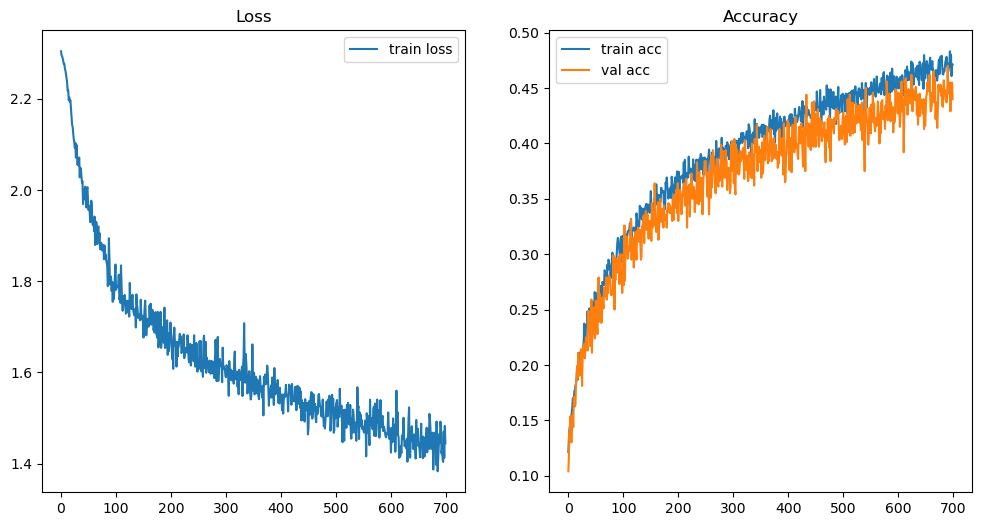

In [ ]:
from models.cnn import ConvolutionalNeuralNetwork

model = ConvolutionalNeuralNetwork(p = 0.2, device = device)
loss, training_accurracy, validation_accuracy = model.fit(train_loader, val_loader, 1000, 0.01, 0.01)

test_accuracy = model.batched_evaluate(test_loader)
print(f"{test_accuracy=}")

plot_results(loss, training_accurracy, validation_accuracy)

In [ ]:
train_data = torchvision.datasets.STL10(
    root="./stl10",
    split="train",
    transform = torchvision.transforms.Compose([
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.RandomRotation((0,30)),
        torchvision.transforms.RandomCrop((64,64)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
)

test_data =  torchvision.datasets.STL10(
    root="./stl10",
    split="test",
    transform = torchvision.transforms.Compose([
        torchvision.transforms.RandomCrop((64,64)),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
)

train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_data, val_data = torch.utils.data.random_split(train_data, [train_size, val_size])


train_loader = torch.utils.data.DataLoader(
    train_data,
    batch_size=1024,
    shuffle=True,
)

val_loader = torch.utils.data.DataLoader(
    val_data,
    batch_size=val_size,
    shuffle=False,
)

test_loader = torch.utils.data.DataLoader(
    test_data,
    batch_size=1000,
    shuffle=False,
)

Using cache found in /Users/arielradomislensky/.cache/torch/hub/pytorch_vision_v0.10.0
/opt/homebrew/anaconda3/envs/biu-project/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/anaconda3/envs/biu-project/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/500, Loss: 2.3039889335632324, Training Accuracy: 0.12339203933189655, Validation Accuracy: 0.104
Epoch 2/500, Loss: 2.2462360858917236, Training Accuracy: 0.14654330549568967, Validation Accuracy: 0.154
Epoch 3/500, Loss: 2.2261078357696533, Training Accuracy: 0.18287816540948276, Validation Accuracy: 0.204
Epoch 4/500, Loss: 2.1897644996643066, Training Accuracy: 0.22191540948275862, Validation Accuracy: 0.225
Epoch 5/500, Loss: 2.1407644748687744, Training Accuracy: 0.26453057650862066, Validation Accuracy: 0.235
Epoch 6/500, Loss: 2.090799570083618, Training Accuracy: 0.27578630118534486, Validation Accuracy: 0.286
Epoch 7/500, Loss: 2.0547332763671875, Training Accuracy: 0.31011752424568967, Validation Accuracy: 0.321
Epoch 8/500, Loss: 1.9991189241409302, Training Accuracy: 0.3366615032327586, Validation Accuracy: 0.342
Epoch 9/500, Loss: 1.9750487804412842, Training Accuracy: 0.3519413389008621, Validation Accuracy: 0.342
Epoch 10/500, Loss: 1.9333990812301636, Training 

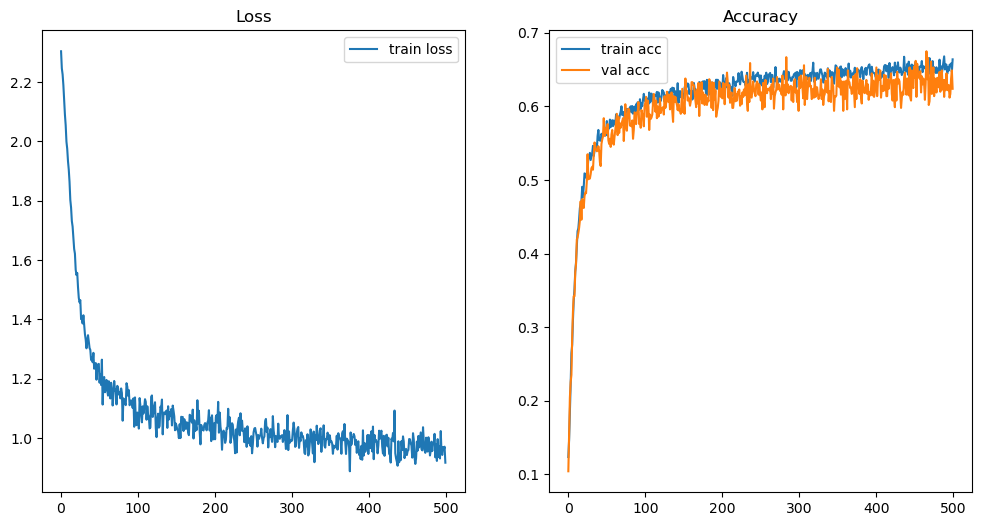

In [ ]:
from models.mbnet import MobileNetV2Classifier

model = MobileNetV2Classifier(fixed = True, p = 0.5, device = device)
loss, training_accurracy, validation_accuracy = model.fit(train_loader, val_loader, 500, 0.01, 0.01)

test_accuracy = model.batched_evaluate(test_loader)
print(f"{test_accuracy=}")

plot_results(loss, training_accurracy, validation_accuracy)

In [ ]:
from models.mbnet import MobileNetV2Classifier

model = MobileNetV2Classifier(fixed = False, p = 0.5, device = device)
loss, training_accurracy, validation_accuracy = model.fit(train_loader, val_loader, 500, 0.001, 0.01)

test_accuracy = model.batched_evaluate(test_loader)
print(f"{test_accuracy=}")

plot_results(loss, training_accurracy, validation_accuracy)

Using cache found in /Users/arielradomislensky/.cache/torch/hub/pytorch_vision_v0.10.0


Epoch 1/500, Loss: 2.3312904834747314, Training Accuracy: 0.09807718211206896, Validation Accuracy: 0.101
Epoch 2/500, Loss: 2.313654661178589, Training Accuracy: 0.11336543642241378, Validation Accuracy: 0.101
Epoch 3/500, Loss: 2.316721200942993, Training Accuracy: 0.11771787446120689, Validation Accuracy: 0.092
Epoch 4/500, Loss: 2.297192335128784, Training Accuracy: 0.11956997575431035, Validation Accuracy: 0.119
Epoch 5/500, Loss: 2.2879433631896973, Training Accuracy: 0.12038658405172414, Validation Accuracy: 0.112
Epoch 6/500, Loss: 2.29489803314209, Training Accuracy: 0.12648168103448276, Validation Accuracy: 0.119
Epoch 7/500, Loss: 2.297545909881592, Training Accuracy: 0.13263570851293105, Validation Accuracy: 0.135
Epoch 8/500, Loss: 2.2761383056640625, Training Accuracy: 0.1326946390086207, Validation Accuracy: 0.134
Epoch 9/500, Loss: 2.2818002700805664, Training Accuracy: 0.13734172952586207, Validation Accuracy: 0.128
Epoch 10/500, Loss: 2.2812089920043945, Training Accu

NameError: name 'plot_results' is not defined